# League of Legends Professional Game Data
# LSTM Neural Network to Predict Game Wins/Losses
## Michael Phillips

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

Using TensorFlow backend.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

df.head()

,match_id,time,gold,top_gold,jgl_gold,mid_gold,adc_gold,sup_gold,kill_total,assist_total,opp_kill_total,opp_assist_total,r_inhib_count,r_baron_count,r_tower_count,r_herald_count,r_drag_count,b_inhib_count,b_baron_count,b_tower_count,b_herald_count,b_dragon_count,kda,opp_kda,result
0,001a1f289e3bab22_b,0.0,2415.0,475.0,475.0,475.0,475.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001a1f289e3bab22_b,1.0,2430.0,475.0,475.0,475.0,475.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001a1f289e3bab22_b,2.0,2751.0,532.0,552.0,532.0,532.0,603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001a1f289e3bab22_b,3.0,3929.0,849.0,817.0,791.0,686.0,786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001a1f289e3bab22_b,4.0,5219.0,1099.0,1099.0,1107.0,976.0,938.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Running the following cell will utilize a Python script to take raw game data and return properly formatted arrays suitable for feeding to an LSTM network. 

The script will take approx. 3 minutes to complete.

In [2]:
%run data_formatting.py

X_train shape:  (169440, 10, 22)
y_train shape:  (169440,)
X_test shape:  (42345, 10, 22)
y_test shape:  (42345,)


In [13]:
model = Sequential()
model.add(Dense(50,batch_input_shape=(4705, X_train[:-64].shape[1],X_train[:-64].shape[2]),
               kernel_constraint=maxnorm(1)))
model.add(Dropout(0.2))
model.add(LSTM(45, stateful=True))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
         optimizer='rmsprop',
         metrics=['accuracy'])

for i in range(55):
    model.fit(X_train[:-64], y_train[:-64], batch_size=4705,shuffle=False, epochs=1,verbose=0)
    model.reset_states()

In [14]:
score = model.evaluate(X_test[:-31], y_test[:-31], verbose=0,batch_size=4705)
score

[0.62441813945770264, 0.64068958163261414]

In [76]:
loss = []
acc = []
for i in range(50):
    history = model.fit(X_train[:-64], y_train[:-64], batch_size=4705,shuffle=False, epochs=1,verbose=0)
    loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    model.reset_states()

In [77]:
score = model.evaluate(X_test[:-31], y_test[:-31], verbose=0,batch_size=4705)
score

[0.84696657127804231, 0.61759357982211638]

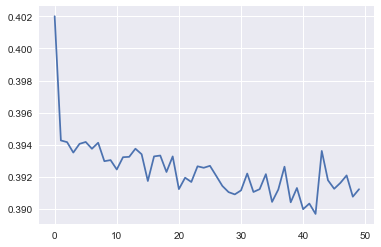

In [78]:
plt.plot(loss)

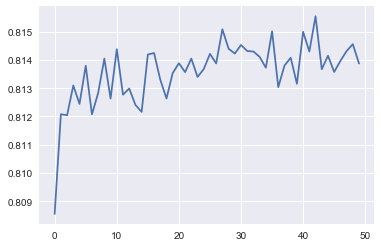

In [79]:
plt.plot(acc)